# 6.4 Supervised Machine Learning

### Content:

1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis
5. Regression analysis without extreme values

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
%matplotlib inline

In [4]:
df_accidents = pd.read_pickle('/Users/tiaoshrieh/Desktop/US accidents project 5-23/02 Data/Prepared data/accidents_clean.pkl')

In [5]:
df_accidents

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date,Year
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,nan,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016-02-08,2016
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,nan,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-02-08,2016
5,A-6,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,At Dela Palma Rd - Accident.,nan,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 08:16:00,35.6,29.2,100.0,29.66,10.0,WSW,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,2016-02-08,2016
7,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,At Bagley Rd/Exit 235 - Accident.,nan,I-71 S,R,Cleveland,Cuyahoga,OH,44130,US,US/Eastern,KCLE,2016-02-08 11:51:00,33.1,30.0,92.0,29.63,0.5,SW,3.5,0.08,Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-02-08,2016
8,A-9,2,2016-02-08 14:19:57,2016-02-08 20:19:57,40.702247,-84.075887,40.699110,-84.084293,0.491,At OH-65/Exit 122 - Accident.,nan,E Hanthorn Rd,R,Lima,Allen,OH,45806,US,US/Eastern,KAOH,2016-02-08 13:53:00,39.0,31.8,70.0,29.59,10.0,WNW,11.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016-02-08,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,nan,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2019-08-23,2019
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,nan,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2019-08-23,2019
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,nan,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2019-08-23,2019
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,nan,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,20

### 2. Data cleaning

In [6]:
#checking for missing values
df_accidents.isnull().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Number                        0
Street                        0
Side                          0
City                          0
County                        0
State                         0
Zipcode                       0
Country                       0
Timezone                      0
Airport_Code                  0
Weather_Timestamp             0
Temperature(F)                0
Wind_Chill(F)                 0
Humidity(%)                3345
Pressure(in)               1720
Visibility(mi)             7232
Wind_Direction                0
Wind_Speed(mph)               0
Precipitation(in)        150012
Weather_Condition             0
Amenity                       0
Bump    

In [7]:
 #creating a new subset with necessary columns:

subset = df_accidents[['Severity',
        'Distance(mi)',
        'State',
        'Temperature(F)',
        'Humidity(%)',
        'Pressure(in)',
        'Visibility(mi)',
        'Wind_Speed(mph)',
        'Precipitation(in)',
        'Weather_Condition']]

In [8]:
#imputing missing values
subset['Precipitation(in)'].fillna(subset['Precipitation(in)'].mean(), inplace=True)

/var/folders/wr/g61q8q917fn2js3wjfr08_0h0000gn/T/ipykernel_1955/3090418467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Precipitation(in)'].fillna(subset['Precipitation(in)'].mean(), inplace=True)


In [9]:
subset['Humidity(%)'].fillna(subset['Humidity(%)'].mean(), inplace=True)

/var/folders/wr/g61q8q917fn2js3wjfr08_0h0000gn/T/ipykernel_1955/1077046684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Humidity(%)'].fillna(subset['Humidity(%)'].mean(), inplace=True)


In [10]:
subset['Pressure(in)'].fillna(subset['Pressure(in)'].mean(), inplace=True)

/var/folders/wr/g61q8q917fn2js3wjfr08_0h0000gn/T/ipykernel_1955/2724456775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Pressure(in)'].fillna(subset['Pressure(in)'].mean(), inplace=True)


In [11]:
subset['Visibility(mi)'].fillna(subset['Visibility(mi)'].mean(), inplace=True)

/var/folders/wr/g61q8q917fn2js3wjfr08_0h0000gn/T/ipykernel_1955/447617672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Visibility(mi)'].fillna(subset['Visibility(mi)'].mean(), inplace=True)


In [12]:
dups = subset.duplicated()

In [13]:
#removing extreme values in the new subset
subset[subset['Precipitation(in)'] > 2]

,Severity,Distance(mi),State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition
33739,2,0.205,NY,42.8,87.0,30.420000,9.056156,8.1,9.94,Overcast
34665,3,0.078,NY,33.8,44.0,30.430000,9.056156,3.5,9.93,Clear
34974,2,0.061,NJ,41.0,93.0,30.420000,9.056156,8.1,9.96,Overcast
35732,3,0.870,NY,42.8,57.0,30.420000,9.056156,6.9,9.95,Overcast
35831,2,0.337,NY,42.8,61.0,30.420000,9.056156,5.8,9.95,Overcast
...,...,...,...,...,...,...,...,...,...,...
2700788,2,0.226,NY,46.4,40.0,29.388533,10.000000,3.5,9.99,Clear
2704601,2,0.946,NY,35.6,93.0,29.388533,5.000000,4.6,9.99,Overcast
2704603,2,0.191,NJ,35.6,93.0,29.388533,5.000000,4.6,9.99,Overcast
2716184,2,0.313,NY,39.2,61.0,29.388533,10.000000,13.8,9.97,Clear


In [14]:
dups.shape

(2375699,)

<Axes: xlabel='Precipitation(in)', ylabel='Count'>

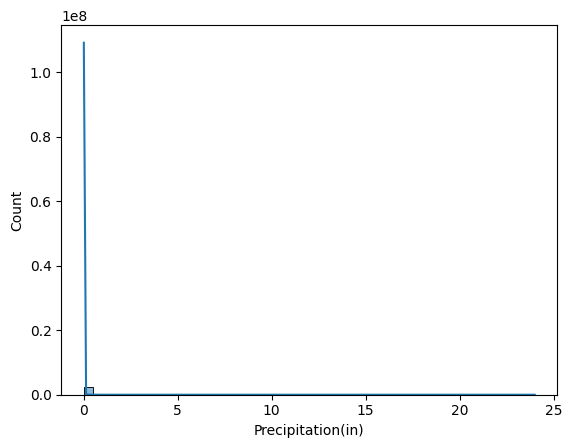

In [15]:
#checking for extreme values
sns.histplot(subset['Precipitation(in)'], bins = 50, kde = True)

In [16]:
subset['Precipitation(in)'].mean()

0.005884475220459225

In [17]:
subset['Precipitation(in)'].median()

0.0

In [18]:
subset['Precipitation(in)'].max()

24.0

<Axes: xlabel='Visibility(mi)', ylabel='Count'>

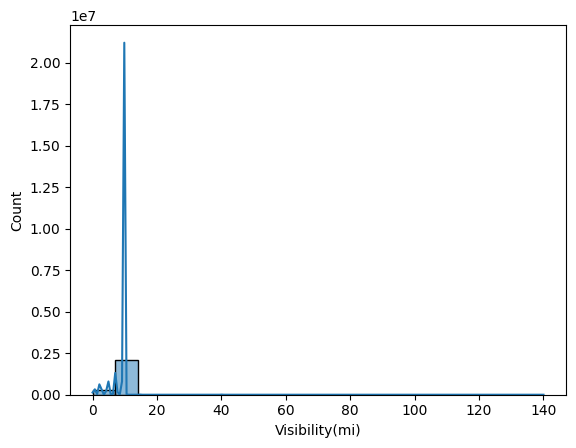

In [19]:
sns.histplot(subset['Visibility(mi)'], bins = 20, kde = True)

In [20]:
subset['Visibility(mi)'].mean()

9.05615642100925

In [21]:
subset['Visibility(mi)'].median()

10.0

In [22]:
subset['Visibility(mi)'].max()

140.0

<Axes: xlabel='Humidity(%)', ylabel='Count'>

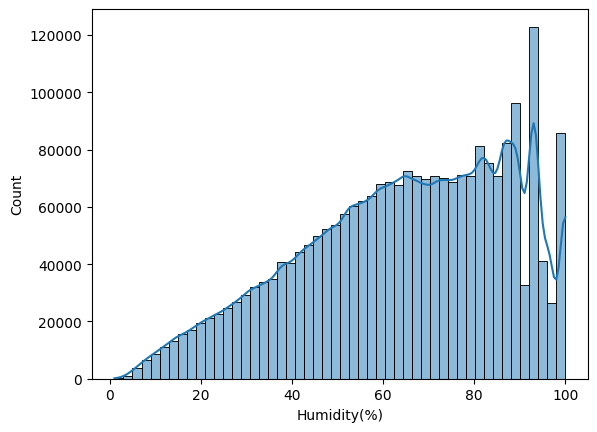

In [23]:
sns.histplot(subset['Humidity(%)'], bins = 50, kde = True)

In [24]:
subset['Humidity(%)'].mean()

64.56936780935732

In [25]:
subset['Humidity(%)'].median()

67.0

In [26]:
subset['Humidity(%)'].max()

100.0

<Axes: xlabel='Distance(mi)', ylabel='Count'>

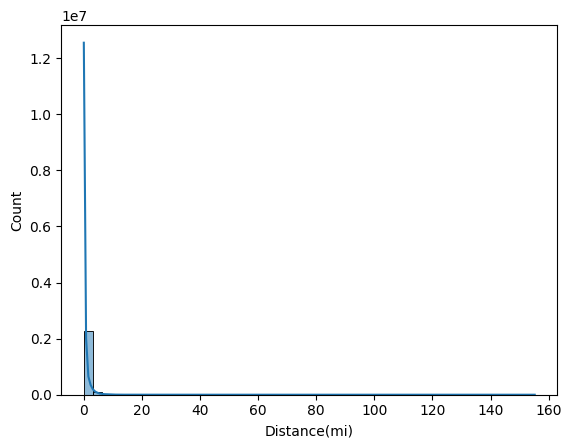

In [27]:
sns.histplot(subset['Distance(mi)'], bins = 50, kde = True)

In [28]:
subset['Distance(mi)'].mean()

0.7007878047681532

In [29]:
subset['Distance(mi)'].median()

0.214

In [30]:
subset['Distance(mi)'].max()

155.186

### 3. Data prep for regression analysis

##### 3.1 Precipitation vs Visibility

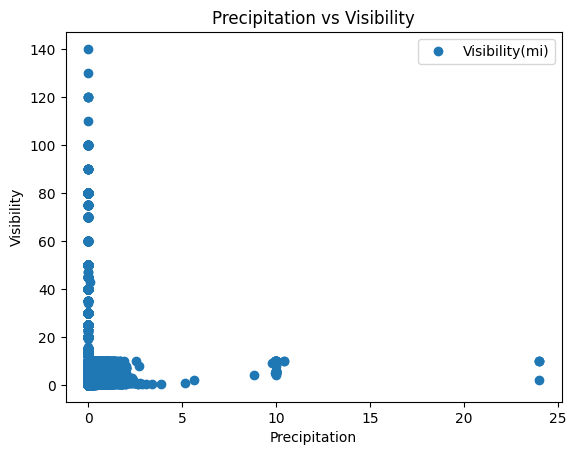

In [31]:
#scatterplot for precipitation and visibility correlation
subset.plot(x = 'Precipitation(in)', y='Visibility(mi)',style='o') 
plt.title('Precipitation vs Visibility')  
plt.xlabel('Precipitation')  
plt.ylabel('Visibility')  
plt.show()

In [32]:
# Reshaping the variables into NumPy arrays and putting them into separate objects.
X = subset['Precipitation(in)'].values.reshape(-1,1)
y = subset['Visibility(mi)'].values.reshape(-1,1)

In [33]:
X

array([[0.        ],
       [0.01      ],
       [0.00588448],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [34]:
y

array([[10.],
       [10.],
       [10.],
       ...,
       [10.],
       [10.],
       [ 7.]])

In [35]:
# Splitting data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##### 3.2 Precipitation vs Humidity

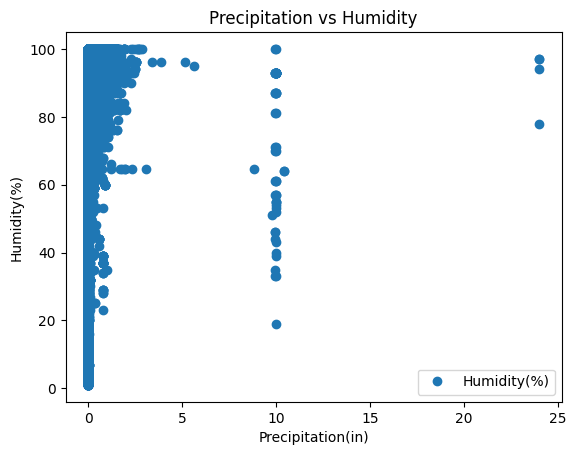

In [36]:
#scatterplot for precipitation and humidity correlation
subset.plot(x = 'Precipitation(in)', y ='Humidity(%)',style='o') 
plt.title('Precipitation vs Humidity')  
plt.xlabel('Precipitation(in)')  
plt.ylabel('Humidity(%)')  
plt.show()

In [37]:
# Reshaping the variables into NumPy arrays and put them into separate objects.
X2 = subset['Precipitation(in)'].values.reshape(-1,1)
y2 = subset['Humidity(%)'].values.reshape(-1,1)

In [38]:
# Splitting data into a training set and a test set.
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

##### 3.3 Precipitation vs Distance

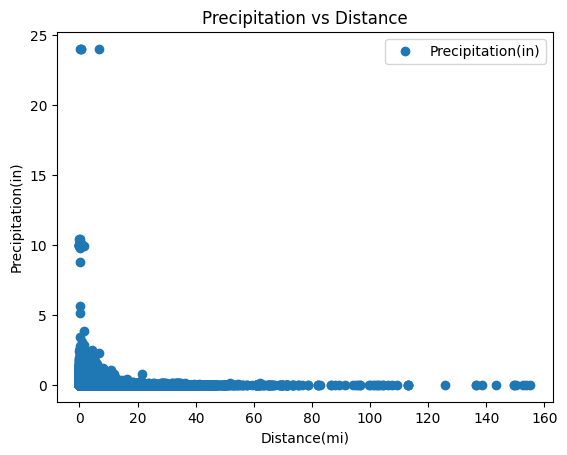

In [39]:
#scatterplot for precipitation and distance correlation
subset.plot(x = 'Distance(mi)', y = 'Precipitation(in)',style='o') 
plt.title('Precipitation vs Distance')  
plt.xlabel('Distance(mi)')  
plt.ylabel('Precipitation(in)')  
plt.show()

In [40]:
# Reshaping the variables into NumPy arrays and put them into separate objects.
X3 = subset['Precipitation(in)'].values.reshape(-1,1)
y3 = subset['Distance(mi)'].values.reshape(-1,1)

In [41]:
# Splitting data into a training set and a test set.
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

### 4. Regression analysis


##### 4.1 Precipitation vs Visibility

Hypothesis: 
    
    Visibility decreases with higher precipitation.


In [42]:
# Creating a regression object.
regression = LinearRegression()

In [43]:
# Fitting the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [44]:
# Fitting the regression object onto the test set.
y_predicted = regression.predict(X_test)

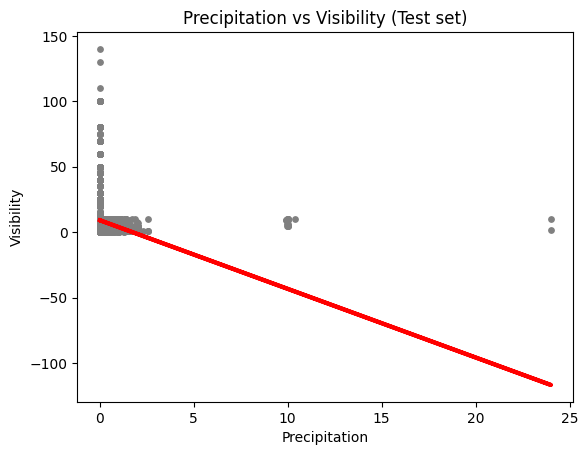

In [45]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Precipitation vs Visibility (Test set)')
plot_test.xlabel('Precipitation')
plot_test.ylabel('Visibility')
plot_test.show()

In [46]:
#testing the regression model
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [47]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-5.24294978]]
Mean squared error:  6.852829020544597
R2 score:  0.013776998571391696


##### 4.2 Precipitation vs Humidity

Hypothesis:

    High precipitation numbers occur with higher humidity.


In [48]:
# Fitting the regression object onto the training set.
regression.fit(X2_train, y2_train)

LinearRegression()

In [49]:
# Fitting the regression object onto the test set.
y2_predicted = regression.predict(X2_test)

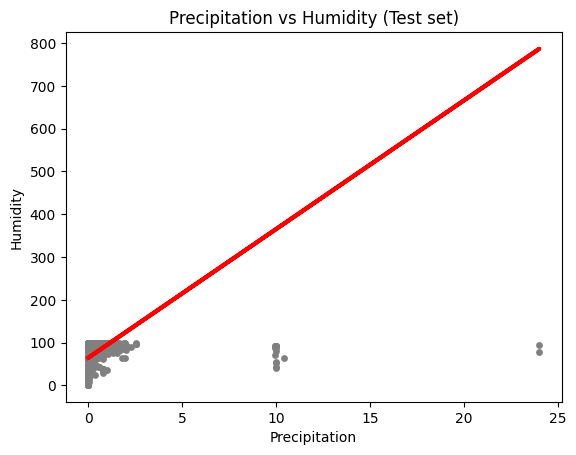

In [50]:
# Creating a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X2_test, y2_test, color='gray', s = 15)
plot_test.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test.title('Precipitation vs Humidity (Test set)')
plot_test.xlabel('Precipitation')
plot_test.ylabel('Humidity')
plot_test.show()

In [51]:
#testing the regression model
rmse = mean_squared_error(y2_test, y2_predicted) 
r2 = r2_score(y2_test, y2_predicted) 

In [52]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[30.08749479]]
Mean squared error:  516.1831524072583
R2 score:  0.006277882797376733


##### 4.3 Precipitation vs Distance

Hypothesis

    A larger road extent will be affected by accident with higher precipitation.

In [53]:
# Fitting the regression object onto the training set.
regression.fit(X3_train, y3_train)

LinearRegression()

In [54]:
# Fitting the regression object onto the test set.
y3_predicted = regression.predict(X3_test)

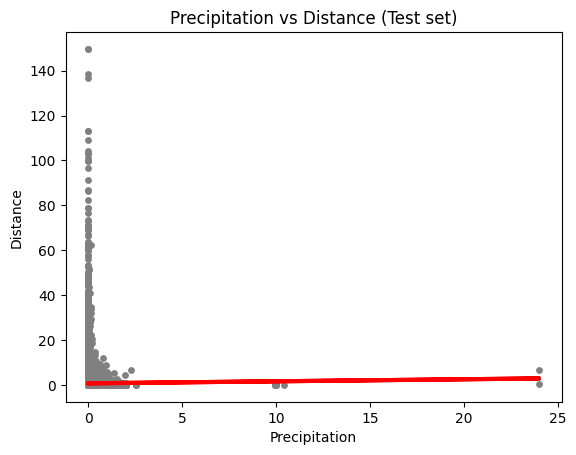

In [55]:
# Creating a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X3_test, y3_test, color='gray', s = 15)
plot_test.plot(X3_test, y3_predicted, color='red', linewidth =3)
plot_test.title('Precipitation vs Distance (Test set)')
plot_test.xlabel('Precipitation')
plot_test.ylabel('Distance')
plot_test.show()

In [56]:
#testing the regression model
rmse = mean_squared_error(y3_test, y3_predicted) 
r2 = r2_score(y3_test, y3_predicted) 

In [57]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.09108141]]
Mean squared error:  2.4973721777997606
R2 score:  1.880869268267027e-05


### 5. Regression analysis without extreme values

In [58]:
#new subset without the extreme values

sub2 = subset[['Severity',
        'Distance(mi)',
        'State',
        'Temperature(F)',
        'Humidity(%)',
        'Pressure(in)',
        'Visibility(mi)',
        'Wind_Speed(mph)',
        'Precipitation(in)',
        'Weather_Condition']]

##### 5.1 Precipitation vs Visibility

In [59]:
#removing extreme values
sub2 = sub2[sub2['Visibility(mi)'] <= 12]

In [60]:
sub2 = sub2[sub2['Precipitation(in)'] <= 2]

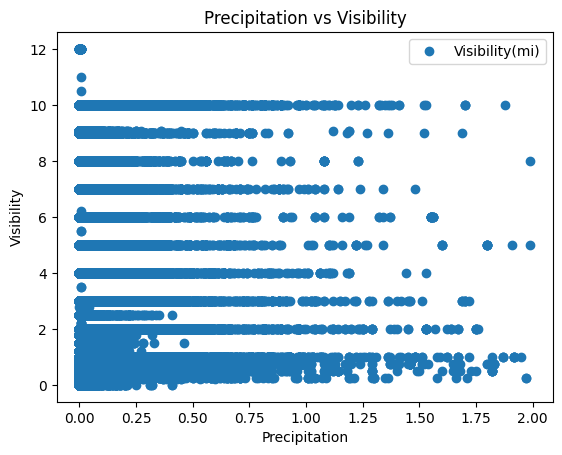

In [61]:
#scatterplot for precipitation and visibility correlation after removing extreme values
sub2.plot(x = 'Precipitation(in)', y='Visibility(mi)',style='o') 
plt.title('Precipitation vs Visibility')  
plt.xlabel('Precipitation')  
plt.ylabel('Visibility')  
plt.show()

In [62]:
# Reshaping the variables into NumPy arrays and put them into separate objects.
X1 = sub2['Precipitation(in)'].values.reshape(-1,1)
y1 = sub2['Visibility(mi)'].values.reshape(-1,1)

In [63]:
# Splitting data into a training set and a test set.
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [64]:
# Creating a regression object.
regression1 = LinearRegression()

In [65]:
# Fittting the regression object onto the training set.
regression1.fit(X1_train, y1_train)

LinearRegression()

In [66]:
# Fitting the regression object onto the test set.
y1_predicted = regression1.predict(X1_test)

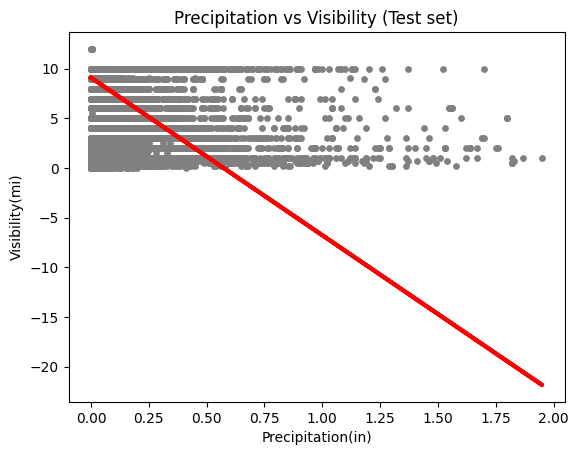

In [67]:
# Creating a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X1_test, y1_test, color='gray', s = 15)
plot_test.plot(X1_test, y1_predicted, color='red', linewidth =3)
plot_test.title('Precipitation vs Visibility (Test set)')
plot_test.xlabel('Precipitation(in)')
plot_test.ylabel('Visibility(mi)')
plot_test.show()

In [68]:
#testing the regression model
rmse = mean_squared_error(y1_test, y1_predicted) 
r2 = r2_score(y1_test, y1_predicted) 

In [69]:
print('Slope:' ,regression1.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-15.868033]]
Mean squared error:  5.181078828803527
R2 score:  0.06625243082757826


The slope is a negative number indicating that as precipitation increases, visibility decreases.

The MSE is quite large compared to the data points which indicates that the data points are far away from the regression line and the line does not accurately represent the data.

The R2 score is very close to 0 which indicates the model is a poor fit.

##### 5.2 Precipitation vs Humidity

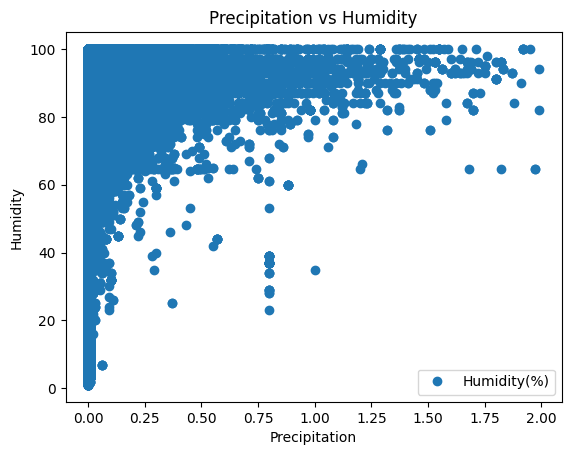

In [70]:
#scatterplot for precipitation and humidity correlation after removing extreme values
sub2.plot(x = 'Precipitation(in)', y='Humidity(%)',style='o') 
plt.title('Precipitation vs Humidity')  
plt.xlabel('Precipitation')  
plt.ylabel('Humidity')  
plt.show()

In [71]:
# Reshaping the variables into NumPy arrays and put them into separate objects.
X4 = sub2['Precipitation(in)'].values.reshape(-1,1)
y4 = sub2['Humidity(%)'].values.reshape(-1,1)

In [72]:
# Splitting data into a training set and a test set.
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=0)

In [73]:
# Fittting the regression object onto the training set.
regression1.fit(X4_train, y4_train)

LinearRegression()

In [74]:
# Fittting the regression object onto the test set.
y4_predicted = regression1.predict(X4_test)

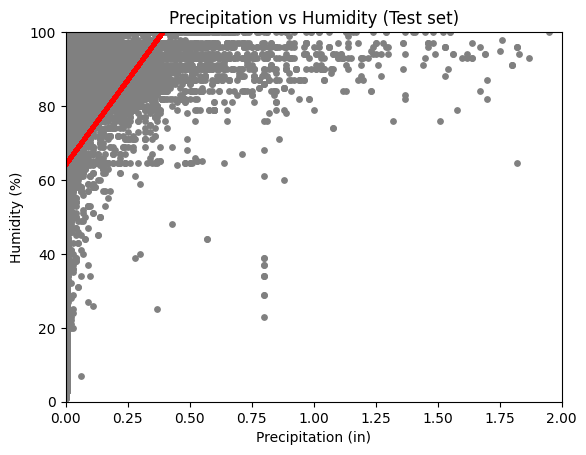

In [92]:
# Creating a plot that shows the regression line from the model on the test set.
plot_test1 = plt
plot_test1.scatter(X4_test, y4_test, color='gray', s=15)
plot_test1.plot(X4_test, y4_predicted, color='red', linewidth=3)
plot_test1.title('Precipitation vs Humidity (Test set)')
plot_test1.xlabel('Precipitation (in)')
plot_test1.ylabel('Humidity (%)')

plot_test1.xlim(0.00, 2.00)  # Replace x_min and x_max with your desired limits
plot_test1.ylim(0, 100)

plt.savefig('regression_plot.png', format='png', dpi=300)
plt.show()

In [93]:
#exporting the plot
plot_test1.savefig('Precipitation-Humidity-reg.png', dpi=300)

<Figure size 640x480 with 0 Axes>

In [77]:
#testing regression model
rmse = mean_squared_error(y4_test, y4_predicted) 
r2 = r2_score(y4_test, y4_predicted) 

In [78]:
print('Slope:' ,regression1.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[91.43063591]]
Mean squared error:  507.5529877086557
R2 score:  0.023435379899070075


The slope is indicative of a positive relationship between precipitation and humidity.

MSE is a very large number and the model cannot be an accurate representation of the data.

R2 score is closer to 0 which indicates that the model cannot be a good fit.

##### 5.3 Precipitation vs Distance

In [79]:
#removing extreme values
sub2 = sub2[sub2['Distance(mi)'] <= 8]

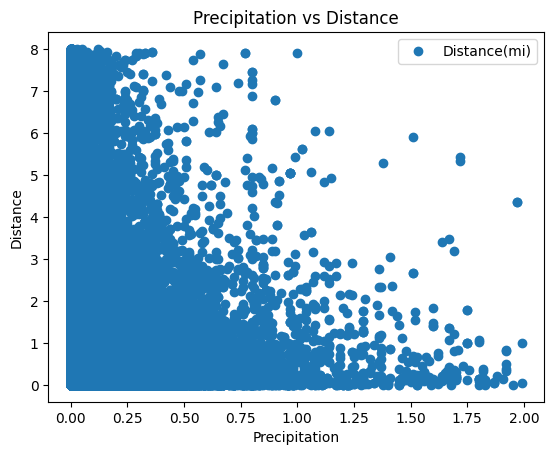

In [80]:
#scatterplot for precipitation and distance correlation after removing extreme values
sub2.plot(x = 'Precipitation(in)', y='Distance(mi)',style='o') 
plt.title('Precipitation vs Distance')  
plt.xlabel('Precipitation')  
plt.ylabel('Distance')  
plt.show()

In [81]:
# Reshaping the variables into NumPy arrays and put them into separate objects.
X5 = sub2['Precipitation(in)'].values.reshape(-1,1)
y5 = sub2['Distance(mi)'].values.reshape(-1,1)

In [82]:
# Splitting data into a training set and a test set.
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=0)

In [83]:
# Fittting the regression object onto the training set.
regression1.fit(X5_train, y5_train)

LinearRegression()

In [84]:
# Fittting the regression object onto the test set.
y5_predicted = regression1.predict(X5_test)

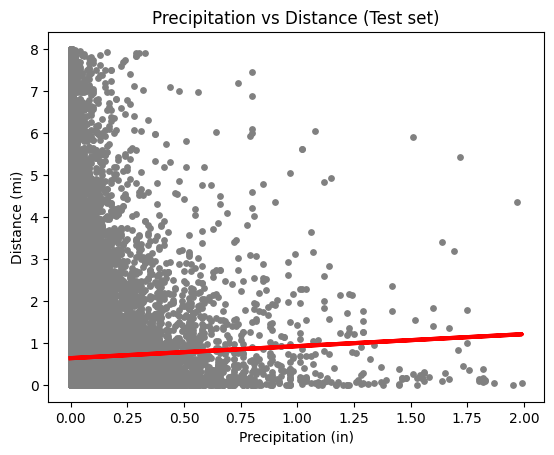

In [89]:
# Create a plot that shows the regression line from the model on the test set.


fig, ax = plt.subplots()
ax.scatter(X5_test, y5_test, color='gray', s=15)
ax.plot(X5_test, y5_predicted, color='red', linewidth=3)
ax.set_title('Precipitation vs Distance (Test set)')
ax.set_xlabel('Precipitation (in)')
ax.set_ylabel('Distance (mi)')

plt.show()

In [91]:
#exporting the plot
plt.savefig('Precipitation-Distance-reg.png', format='png', dpi=300)

<Figure size 640x480 with 0 Axes>

In [119]:
#testing the regression model
rmse = mean_squared_error(y5_test, y5_predicted) 
r2 = r2_score(y5_test, y5_predicted) 

In [120]:
print('Slope:' ,regression1.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.28508384]]
Mean squared error:  1.097673085511507
R2 score:  0.00014338485133846834


The slope shows a positive relationship between distance and precitipation, meaning that as precipitation increases, a longer distance will be affected by the accident.

MSE is not very large which indicates that the data points are mostly close to the regression line making the line an accurate representation of the trends in data.

However, the r2 score is very close to 0 indicating that the model cannot be a great fit.

In [12]:
#exporting the subset without extreme values
sub2.to_pickle('/Users/tiaoshrieh/Desktop/US accidents project 5-23/02 Data/Prepared data/no_extreme_subset.pkl')